# [GK] 10.10.1 Zeitreihenanalyse

Andreas Sünder 5BHIT

## Datacamp Course

### Useful methods

Useful `pandas` methods:

- `df.index = pd.to_datetime(df.index)` to convert the index to a datetime index (for example, from a string)
- `df.plot()` to plot the data
- `df["2012"]` to slice the data by year
- `df1.join(df2)` to merge two dataframes
- `df = df.resample(rule="W").last()` to resample the data to a weekly frequency
- `df["col"].pct_change()` to convert prices to returns
- `df["col"].diff()` to compute the difference between elements
- `df["ABC"].corr(df["XYZ"])` to compute the correlation between two columns
- `df["ABC"].autocorr()` to compute the autocorrelation of a column

### Correlation

The correlation coefficient is a **measure of the linear relationship between two variables**. It ranges from -1 to 1. A value of 1 indicates a perfect positive linear relationship, -1 a perfect negative linear relationship, and 0 no linear relationship.

A common mistake is that the correlation should be **computed on returns (percentages)**, not their returns. This way, it can be avoided that two totally unrelated time series are correlated just because they have a similar trend.

#### Example: Correlation of Stocks and Bonds

*Investors are often interested in the correlation between the returns of two different assets for asset allocation and hedging purposes. In this exercise, you'll try to answer the question of whether stocks are positively or negatively correlated with bonds. Scatter plots are also useful for visualizing the correlation between the two variables.*

```python
# Compute percent change using pct_change()
returns = stocks_and_bonds.pct_change()

# Compute correlation using corr()
correlation = returns["SP500"].corr(returns["US10Y"])
print("Correlation of stocks and interest rates: ", correlation)

# Make scatter plot
plt.scatter(returns["SP500"], returns["US10Y"])
plt.show()
```

![Correlation of Stocks and Bonds](./corr_stocks_bonds.svg)

#### Example: Flying Saucers Aren't Correlated to Flying Markets

*Two trending series may show a strong correlation even if they are completely unrelated. This is referred to as "spurious correlation". That's why when you look at the correlation of say, two stocks, you should look at the correlation of their returns and not their levels.*

![Correlation of Levels and Changes](./corr_saucers_ufos.svg)

```python
# Compute correlation of levels
correlation1 = levels["DJI"].corr(levels["UFO"])
print("Correlation of levels: ", correlation1)

# Compute correlation of percent changes
changes = levels.pct_change()
correlation2 = changes["DJI"].corr(changes["UFO"])
print("Correlation of changes: ", correlation2)
```

Output:

```
Correlation of levels:  0.9399762210726432
Correlation of changes:  0.06026935462405376
```

### Simple Linear Regression

#### Basics

Formula:

$$
y_t  = \alpha + \beta x_t + \epsilon_t
$$

This is also known as **Ordinary Least Squares (OLS)** as it minimizes the sum of the square distances between the data points and the regression line.

#### Common functions
 
In `statmodels`:
```python
import statsmodels.api as sm
model = sm.OLS(y, x).fit()
```

In `numpy`:
```python
import numpy as np
beta = np.polyfit(x, y, deg=1) # deg=1 for linear regression
```

In `pandas`:
```python
import pandas as pd
model = pd.ols(y, x)
```

In `scipy`:
```python
from scipy import stats
stats.linregress(x, y)
```

## Zeitreihenanalyse

Lade den Datensatz zu den 500 wichtigsten börsennotierten Unternehmen der US ( S&P 500 ) herunter. Speichere die Informationen zur Firma "IBM" in eine Variable und arbeite ab nun mit diesen Zeitreihen.

- Stelle den Verlauf des Eröffnungskurses (open), höchsten Tageskurses (high), niedrigsten Tageskurses (low) und Börsenschlusskurses (close) graphisch dar. Beschreibe, was dabei auffällt und wie diese Zeitreihen zusammenhängen.
- Modelliere den Rolling Mean = Moving Average jeder dieser 4 Zeitreihen und stelle diese graphisch jeweils in Kombination mit der ursprünglichen Zeitreihe dar.
- Stelle die Autokorrelation und partielle Autokorrelation der 4 Zeitreihen graphisch dar. Beschreibe, was dabei auffällt und wie diese Darstellungen und ihre Zeitreihen zusammenhängen.
- Passe für eine dieser Zeitreihen ein autoregressives Modell an, wobei du dafür die in den Autokorrelationsplots erkennbare Ordnung wählst. Interpretiere dieses Modell.
- Sage anhand des Modells den Börsenkurs in den ersten 5 Tagen nach Ende der Zeitreihe vorher.

In [1]:
import pandas as pd
df = pd.read_csv('./IBM_data.csv', index_col=0)
df.index = pd.to_datetime(df.index)

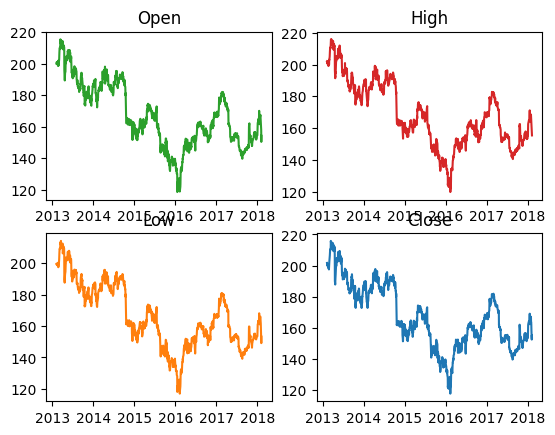

In [2]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 2)
ax[0, 0].set_title('Open')
ax[0, 0].plot(df['open'], 'tab:green')
ax[0, 1].set_title('High')
ax[0, 1].plot(df['high'], 'tab:red')
ax[1, 0].set_title('Low')
ax[1, 0].plot(df['low'], 'tab:orange')
ax[1, 1].set_title('Close')
ax[1, 1].plot(df['close'], 'tab:blue')
plt.show()

Die oben dargestellten Kurse sind für alle Jahre fast identisch und überlagern sich.

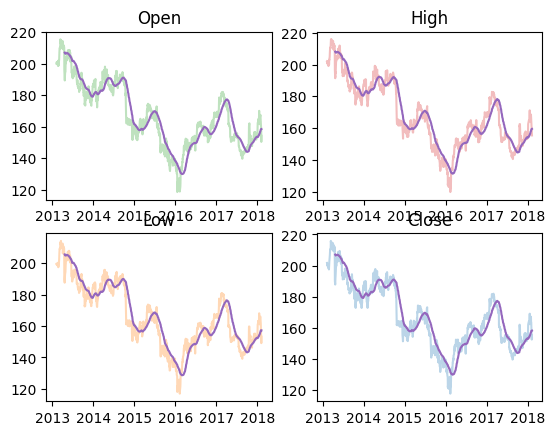

In [3]:
fig, ax = plt.subplots(2, 2)
ax[0, 0].set_title('Open')
ax[0, 0].plot(df['open'], 'tab:green', alpha=0.3)
ax[0, 0].plot(df['open'].rolling(50).mean().dropna(), 'tab:purple')
ax[0, 1].set_title('High')
ax[0, 1].plot(df['high'], 'tab:red', alpha=0.3)
ax[0, 1].plot(df['high'].rolling(50).mean().dropna(), 'tab:purple')
ax[1, 0].set_title('Low')
ax[1, 0].plot(df['low'], 'tab:orange', alpha=0.3)
ax[1, 0].plot(df['low'].rolling(50).mean().dropna(), 'tab:purple')
ax[1, 1].set_title('Close')
ax[1, 1].plot(df['close'], 'tab:blue', alpha=0.3)
ax[1, 1].plot(df['close'].rolling(50).mean().dropna(), 'tab:purple')
plt.show()

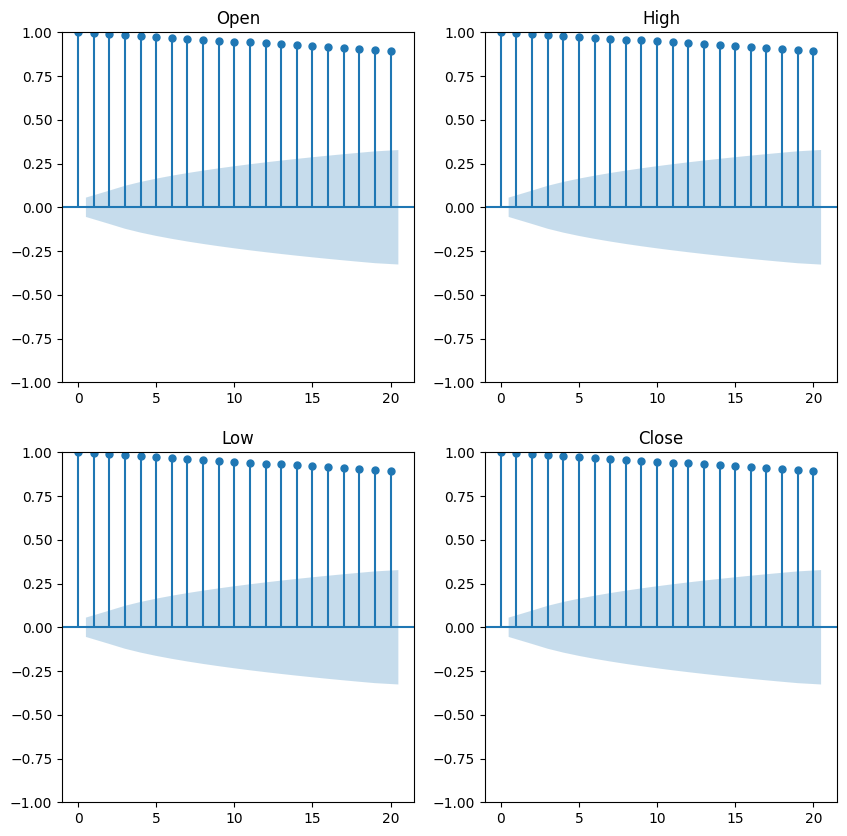

In [4]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0] = plot_acf(df['open'], ax=ax[0, 0], lags=20, title='Open')
ax[0, 1] = plot_acf(df['high'], ax=ax[0, 1], lags=20, title='High')
ax[1, 0] = plot_acf(df['low'], ax=ax[1, 0], lags=20, title='Low')
ax[1, 1] = plot_acf(df['close'], ax=ax[1, 1], lags=20, title='Close')
plt.show()

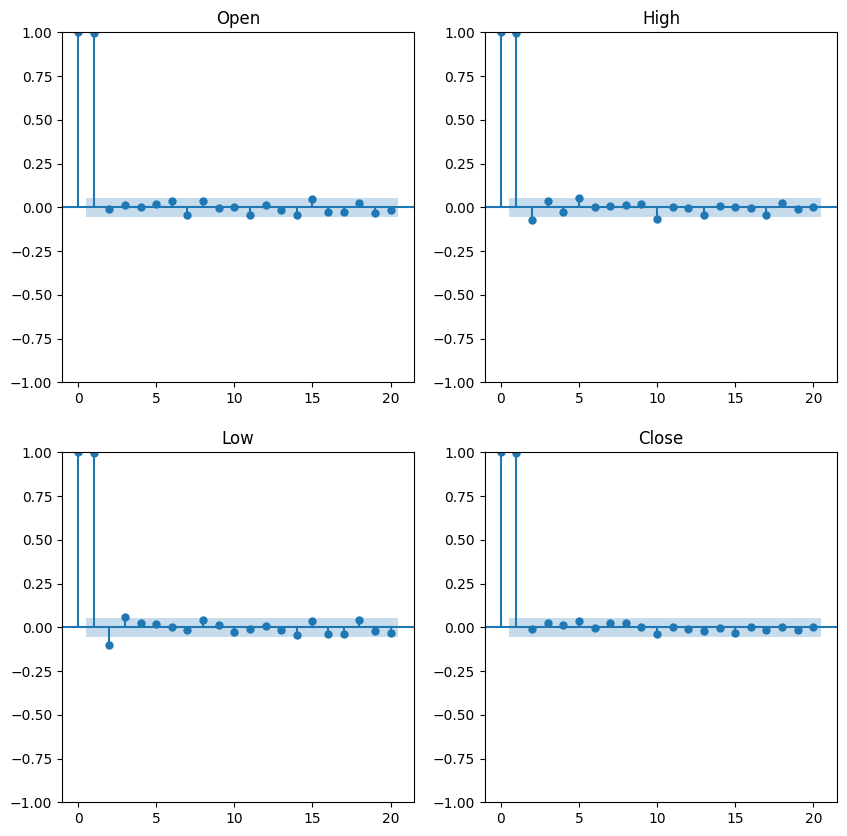

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0] = plot_pacf(df['open'], ax=ax[0, 0], lags=20, title='Open')
ax[0, 1] = plot_pacf(df['high'], ax=ax[0, 1], lags=20, title='High')
ax[1, 0] = plot_pacf(df['low'], ax=ax[1, 0], lags=20, title='Low')
ax[1, 1] = plot_pacf(df['close'], ax=ax[1, 1], lags=20, title='Close')
plt.show()

Nachdem die ursprünglichen Zeitreihe alle sehr ähnlich sind, fallen die Autokorrelations- sowie die partiellen Autokorrelationsplots auch sehr ähnlich aus. Die Autokorrelation ist bei allen Zeitreihen sehr hoch, was bedeutet, dass die Werte der Zeitreihe stark von den vorherigen Werten abhängen.

Ausgewählte Zeitreihe für das autoregressive Modell: "open"

In [6]:
from statsmodels.tsa.arima.model import ARIMA
X = df['open'].values
model = ARIMA(X, order=(1, 0, 0))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1259
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2599.162
Date:                Sun, 07 Apr 2024   AIC                           5204.323
Time:                        21:22:41   BIC                           5219.737
Sample:                             0   HQIC                          5210.116
                               - 1259                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        167.4125     10.272     16.298      0.000     147.279     187.546
ar.L1          0.9959      0.002    430.525      0.000       0.991       1.000
sigma2         3.6228      0.064     56.731      0.000       3.498       3.748
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              4977.72
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.59   Skew:                            -1.36
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Für das autoregressive Modell wurde die Ordnung 1 gewählt; des Weiteren haben wir 10% des Ursprungsdatensatzes als Testdaten verwendez. Auf Basis der Summary ergibt sich ein Intercept von $0.7441$ mit einem Standardfehler von $0.474$, was in dieser Relation ungewöhnlich hoch ist. Das `k` beträgt hier $0.9953$ mit einem minimalen Standardfehler von $0.003$.

In [7]:
from pandas.tseries.offsets import DateOffset
future_dates = [df.index[-1] + DateOffset(days=x) for x in range(0, 6)]
future_dates_df=pd.DataFrame(index=future_dates[1:],columns=['open'])
future_dates_df['forecast'] = model_fit.forecast(steps=5)
future_dates_df['forecast']

2018-02-08    154.224217
2018-02-09    154.278212
2018-02-10    154.331986
2018-02-11    154.385540
2018-02-12    154.438875
Name: forecast, dtype: float64

/var/folders/mx/px22c6tj3rz__gl1g635_wsm0000gn/T/ipykernel_79934/4061554268.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_df=pd.concat([df,future_dates_df])


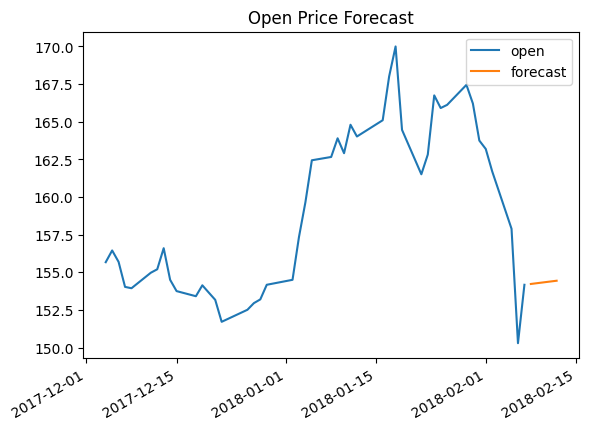

In [8]:
future_df=pd.concat([df,future_dates_df])
future_df[['open', 'forecast']].tail(n=50).plot()
plt.title('Open Price Forecast')
plt.show()

## Zeitreihenanalyse (EK)

- Passe für eine dieser Zeitreihen ein ARIMA-Modell an, wobei du dafür unterschiedliche Parameterkombinationen testest. (EK)
- Führe einen Modellvergleich der unterschiedlichen Modelle durch und interpretiere die Modelle. (EK)
- Sage mit allen angepassten Modellen den Börsenkurs am 5. Tag nach Ende der Zeitreihe vorher und vergleiche die Prädiktionen. (EK)

Hier vergleichen wir ARMA und ARIMA Modelle für die Zeitreihe "open". Reine ARMA-Modelle können mit "stationären" Zeitreihen umgehen, die etwa dieselbe Varianz bzw. denselben Mittelwert über die Zeit haben. ARIMA-Modelle hingegen können auch mit nicht-stationären Zeitreihen umgehen, indem sie die Differenz der Zeitreihe betrachten.

In [13]:
from statsmodels.tsa.arima.model import ARIMA
X = df['open'].values

arima_model1 = ARIMA(X, order=(1, 1, 1))
arima_model1_fit = arima_model1.fit()
arma_model1 = ARIMA(X, order=(1, 0, 1))
arma_model1_fit = arma_model1.fit()

In [15]:
print(arima_model1_fit.summary())
print(arma_model1_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1259
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2593.858
Date:                Sun, 07 Apr 2024   AIC                           5193.716
Time:                        21:40:13   BIC                           5209.128
Sample:                             0   HQIC                          5199.508
                               - 1259                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9562      0.053    -17.995      0.000      -1.060      -0.852
ma.L1          0.9393      0.062     15.120      0.000       0.818       1.061
sigma2         3.6178      0.064     56.768      0.0

/var/folders/mx/px22c6tj3rz__gl1g635_wsm0000gn/T/ipykernel_79934/1837066836.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_df=pd.concat([df,future_dates_df])


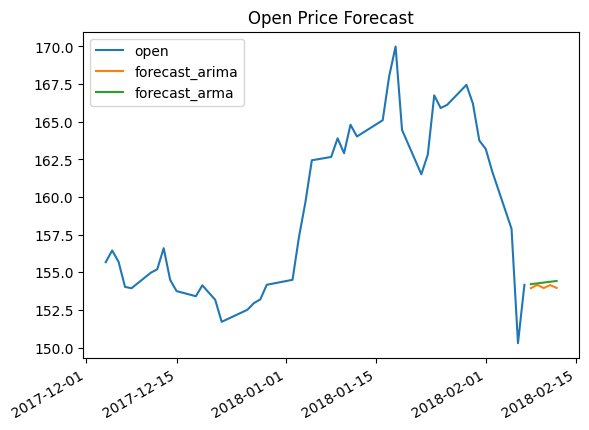

In [17]:
from pandas.tseries.offsets import DateOffset
future_dates = [df.index[-1] + DateOffset(days=x) for x in range(0, 6)]
future_dates_df=pd.DataFrame(index=future_dates[1:],columns=['open'])
future_dates_df['forecast_arima'] = arima_model1_fit.forecast(steps=5)
future_dates_df['forecast_arma'] = arma_model1_fit.forecast(steps=5)

future_df=pd.concat([df,future_dates_df])
future_df[['open', 'forecast_arima', 'forecast_arma']].tail(n=50).plot()
plt.title('Open Price Forecast')
plt.show()